In [150]:
# Importamos bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler

# Cargamos los datos
file_path = "df_tabla_minable_todo.csv"  
df = pd.read_csv(file_path)

# Separamos la variable objetivo 
X = df.drop(columns=["RENDIMIENTO BAJO_SI"]) 
y = df["RENDIMIENTO BAJO_SI"].astype(int)  

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicamos oversampling en el conjunto de entrenamiento
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Estandarizamos las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  
X_test_scaled = scaler.transform(X_test)

# Construimos el modelo 
model = Sequential([
    Dense(8, activation='relu', input_dim=X_train_scaled.shape[1]),  # 1 capa oculta 
    Dense(1, activation='sigmoid')                                   # Capa de salida
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(X_train_scaled, y_train_balanced, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluamos el modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Mostramos el proceso de entrenamiento en las diferentes epocas
print(f"Pérdida en el conjunto de prueba : {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba : {test_accuracy:.4f}")

Epoch 1/200


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6084 - loss: 0.7366 - val_accuracy: 0.1479 - val_loss: 0.9991
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6102 - loss: 0.6756 - val_accuracy: 0.1761 - val_loss: 0.9791
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6157 - loss: 0.6891 - val_accuracy: 0.1620 - val_loss: 0.9529
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6319 - loss: 0.6624 - val_accuracy: 0.1549 - val_loss: 0.9425
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.6598 - val_accuracy: 0.1549 - val_loss: 0.9322
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.6474 - val_accuracy: 0.1549 - val_loss: 0.9205
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6338 - loss: 0.6453 - val_accuracy: 0.1549 - val_loss: 0.9103
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.6400 - val_accuracy: 0.1549 - val_loss: 0.

In [151]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predecimos en los conjuntos de entrenamiento y prueba
# Para el conjunto de entrenamiento, usamos los datos balanceados
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int)
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Métricas para el conjunto de entrenamiento
print("Conjunto de Entrenamiento:")
train_conf_matrix = confusion_matrix(y_train_balanced, y_train_pred)
print("Matriz de Confusión:")
print(train_conf_matrix)

train_report = classification_report(y_train_balanced, y_train_pred, digits=4)
print("\nReporte de Clasificación:")
print(train_report)

# Métricas para el conjunto de prueba
print("\nConjunto de Prueba:")
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión:")
print(test_conf_matrix)

test_report = classification_report(y_test, y_test_pred, digits=4)
print("\nReporte de Clasificación:")
print(test_report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Conjunto de Entrenamiento:
Matriz de Confusión:
[[306  49]
 [105 250]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.7445    0.8620    0.7990       355
           1     0.8361    0.7042    0.7645       355

    accuracy                         0.7831       710
   macro avg     0.7903    0.7831    0.7817       710
weighted avg     0.7903    0.7831    0.7817       710


Conjunto de Prueba:
Matriz de Confusión:
[[120  33]
 [ 26  13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8219    0.7843    0.8027       153
           1     0.2826    0.3333    0.3059        39

    accuracy                         0.6927       192
   macro avg     0.5523    0.5588    0.5543       192
weighted avg     0.7124    0.6927    0.7018       192



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


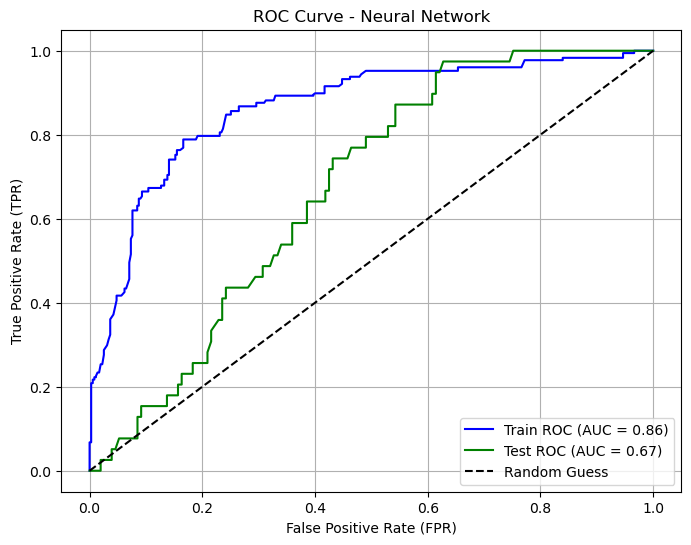

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que ya tienes un modelo de red neuronal entrenado y escalaste los datos: X_train_scaled, X_test_scaled

# Obtener las probabilidades para la clase positiva
y_train_prob = model.predict(X_train_scaled).ravel()  # ravel() para aplanar el array si es necesario
y_test_prob = model.predict(X_test_scaled).ravel()

# Calcular las tasas FPR, TPR y el AUC para el conjunto de entrenamiento y prueba
fpr_train, tpr_train, _ = roc_curve(y_train_balanced, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Línea de referencia
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [153]:
import pandas as pd

# Cargar el archivo adjunto para verificar su estructura
file_path_new = 'df_tabla_minable_VERIFICAR_4.csv'
df_nuevos_registros = pd.read_csv(file_path_new)

# Mostrar las primeras filas para verificar la estructura del archivo
df_nuevos_registros.head()


,Anio,Hermanos,Edad,Genero_F,Genero_M,Padre_NO,Padre_SI,Madre_NO,Madre_SI,RENDIMIENTO BAJO_SI,Zona_Cala Cala,Zona_Centro,Zona_Norte,Zona_Quillacollo,Zona_Sacaba,Zona_Seminario,Zona_Sud,Zona_Taquina
0,-1.274164,-1.207311,1.697353,True,False,False,True,False,True,True,False,False,False,False,True,False,False,False
1,1.137850,-0.245990,0.005313,False,True,False,True,False,True,True,False,False,False,False,False,True,False,False
2,-1.274164,-1.207311,1.697353,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False
3,-0.068157,-0.245990,0.851333,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False


In [154]:
# Preparamos los datos eliminando la columna objetivo
X_nuevos = df_nuevos_registros.drop(columns=["RENDIMIENTO BAJO_SI"])

# Estandarizamos los datos con el scaler previamente entrenado
X_nuevos_scaled = scaler.transform(X_nuevos)

# Realizamos las predicciones
predicciones_probabilidades = model.predict(X_nuevos_scaled)
predicciones_clases = (predicciones_probabilidades > 0.5).astype(int)

# Añadimos las predicciones al DataFrame original para revisarlas
df_nuevos_registros["Probabilidad"] = predicciones_probabilidades
df_nuevos_registros["Predicción"] = predicciones_clases

# Mostrar el resultado
print(df_nuevos_registros.head()) 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
       Anio  Hermanos      Edad  Genero_F  Genero_M  Padre_NO  Padre_SI  \
0 -1.274164 -1.207311  1.697353      True     False     False      True   
1  1.137850 -0.245990  0.005313     False      True     False      True   
2 -1.274164 -1.207311  1.697353      True     False     False      True   
3 -0.068157 -0.245990  0.851333     False      True     False      True   

   Madre_NO  Madre_SI  RENDIMIENTO BAJO_SI  Zona_Cala Cala  Zona_Centro  \
0     False      True                 True           False        False   
1     False      True                 True           False        False   
2     False      True                False           False         True   
3     False      True                False           False        False   

   Zona_Norte  Zona_Quillacollo  Zona_Sacaba  Zona_Seminario  Zona_Sud  \
0       False             False         True           False     False   
1       False             False        False            True  